# <font color = "green">**Projet :** Absence de pourboire chez les chauffeurs de taxi à New York</font>

<font color = "green"> **-** </font> Ce projet vise à  aider les conducteurs de taxi en leurs Permettant de mieux cibler les clients susceptibles de ne pas laisser de pourboire, afin qu'ils puissent adapter leur comportement en conséquence et d'Optimiser leurs revenus en fournissant un outil qui leur permettra d’améliorer leur stratégie pour maximiser les pourboires.

<font color = "green"> **- objectif :** </font> prédire si un client sera généreux ou pas après un trajet en taxi.

<font color = "green"> **-** </font> Le choix du modèle adapté pour notre analyse va dépendre du type de données utilisés et des relations complexes ou non entre elles.

## <font color = "green"> **Analyse :**</font>

Cette étape vise à comprendre en profondeur les données nécessaires pour entraîner le modèle. L'objectif est de préparer les données pour qu'elles soient prêtes à l'emploi pour le modèle choisi, en analysant les variables de réponse et les variables prédictives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Lire les deux fichiers CSV
data1 = pd.read_csv('2017_Yellow_Taxi_Trip_Data.csv')
data2 = pd.read_csv('nyc_preds_means.csv')

In [3]:
# Fusionner les deux datasets en utilisant les indices
data = pd.merge(data1, data2, left_index=True, right_index=True, how='inner')

In [4]:
# Vérifier la structure du dataset fusionné
data.shape

(22699, 21)

In [5]:
# Afficher les premières lignes du dataset fusionné
data.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,...,13.0,0.0,0.5,2.76,0.0,0.3,16.56,22.847222,3.521667,16.434245
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,...,16.0,0.0,0.5,4.00,0.0,0.3,20.80,24.470370,3.108889,16.052218
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,...,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.250000,0.881429,7.053706
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,...,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,3.700000,18.731650
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,...,16.5,0.5,0.5,0.00,0.0,0.3,17.80,14.616667,4.435000,15.845642


#### <font color = "green"> **EDA : exploration des données**</font>

In [6]:
df = data.copy()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [8]:
df.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,mean_duration,mean_distance,predicted_fare
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502,14.460555,2.913313,12.979534
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295,10.080913,3.558993,9.706126
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000,0.000000,0.000000,2.934494
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000,8.031481,1.010000,7.396030
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000,11.556667,1.620000,9.560801
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000,17.321667,3.115625,13.933373
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000,88.783333,33.920000,89.171050


In [9]:
# vérifier les valeurs manquantes 
df.isnull().sum()

Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
mean_duration            0
mean_distance            0
predicted_fare           0
dtype: int64

In [10]:
# vérifier la présence de doublon 
df.duplicated().sum()

0

In [11]:
# supprimer les colonnes inutiles
df= df.drop("Unnamed: 0",axis=1)

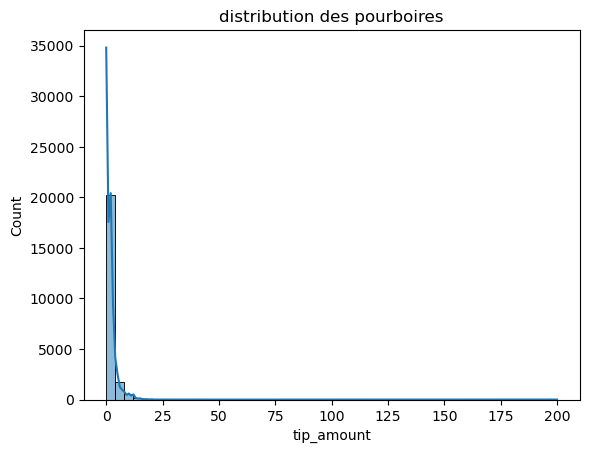

In [12]:
# visualiser la répartition des pourboires 
sns.histplot(df['tip_amount'], bins=50, kde=True)
plt.title("distribution des pourboires")
plt.show()

In [13]:
df = df[df['fare_amount'] > 0]

In [14]:
# A partir de la variable "tip_amount" designant le montant du pourboire on va créer une nouvelle variable binaire "is_generous" qui prendra la valeur 1 
# si un client laisse un pourboire supérieur à 20% du montant de la course et 0 si non; cette nouvelle variable créé sera notre target dans l'analyse
df['is_generous'] = np.where(df['tip_amount'] >= 0.2 * df['fare_amount'], 1, 0)
print(df['is_generous'])

0        1
1        1
2        1
3        1
4        0
        ..
22694    0
22695    1
22696    0
22697    0
22698    1
Name: is_generous, Length: 22679, dtype: int32


In [15]:
# Analyser notre variable cible
# Vérifier la distribution de notre variable is_tip pour une meilleure analyse
df['is_generous'].value_counts()

is_generous
0    11583
1    11096
Name: count, dtype: int64

In [16]:
df['is_generous'].value_counts(normalize=True)  # en pourcentage

is_generous
0    0.510737
1    0.489263
Name: proportion, dtype: float64

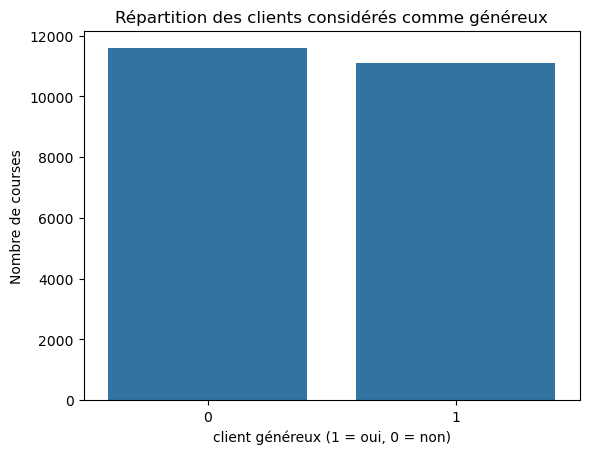

In [17]:
# Visualiser la répartition des clients considérés comme généreux 
sns.countplot(x='is_generous', data=df)
plt.title("Répartition des clients considérés comme généreux")
plt.xlabel("client généreux (1 = oui, 0 = non)")
plt.ylabel("Nombre de courses")
plt.show()

In [18]:
# convertir les colonnes temporelles pour qu'elle soit en format datetime 
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [19]:
# A partir des variables "tpep_pickup_datetime" et "tpep_dropoff_datetime", on peut créer une nouvelle variables "duration_min" qui représente
# la durée d'un trajet en minute pouvant influencer sur le pourboire.
df['duration_min'] = (df['tpep_dropoff_datetime'] -df['tpep_pickup_datetime']).dt.total_seconds() / 60
df['duration_min'].head()

0    14.066667
1    26.500000
2     7.200000
3    30.250000
4    16.716667
Name: duration_min, dtype: float64

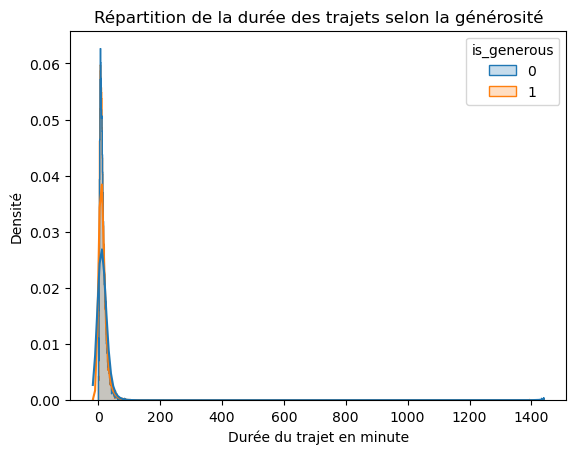

In [20]:
sns.histplot(data=df, x='duration_min', hue='is_generous', kde=True, element="step", stat="density", common_norm=False)
plt.title('Répartition de la durée des trajets selon la générosité')
plt.xlabel('Durée du trajet en minute')
plt.ylabel('Densité')
plt.show()

In [21]:
# On peut aussi extraire à partir de ces variables les informations temporelles pour analyser les données par année, mois, jour et heure
df['tpep_pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['tpep_pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
df['tpep_pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df[['tpep_pickup_datetime', 'tpep_pickup_month', 'tpep_pickup_day', 'tpep_pickup_hour']].head()

,tpep_pickup_datetime,tpep_pickup_month,tpep_pickup_day,tpep_pickup_hour
0,2017-03-25 08:55:43,3,5,8
1,2017-04-11 14:53:28,4,1,14
2,2017-12-15 07:26:56,12,4,7
3,2017-05-07 13:17:59,5,6,13
4,2017-04-15 23:32:20,4,5,23


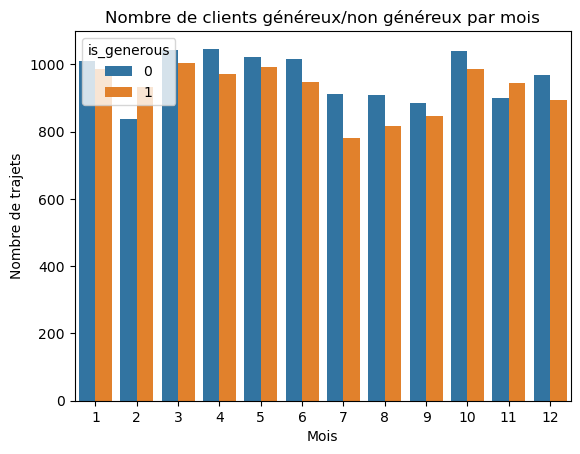

In [22]:
sns.countplot(data=df, x='tpep_pickup_month', hue='is_generous')
plt.title('Nombre de clients généreux/non généreux par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de trajets')
plt.show()

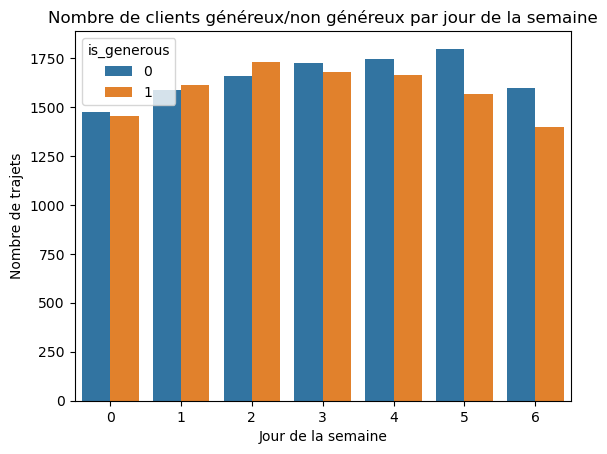

In [23]:
# visualiser la repartion des clients généreux par jour 
sns.countplot(x='tpep_pickup_day', hue='is_generous', data=df)
plt.title("Nombre de clients généreux/non généreux par jour de la semaine")
plt.xlabel('Jour de la semaine')
plt.ylabel('Nombre de trajets')
plt.show()

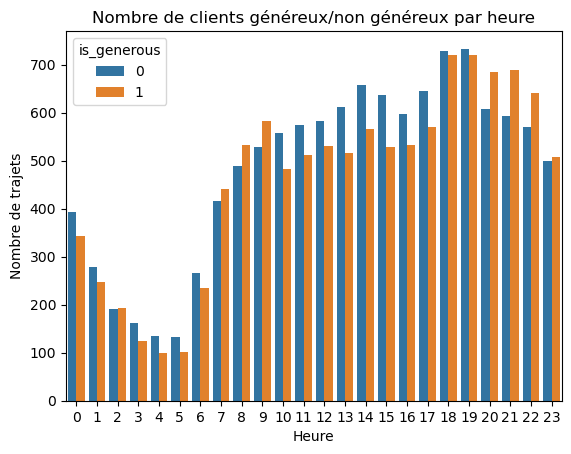

In [24]:
# visualiser la repartion des clients généreux par heure
sns.countplot(x='tpep_pickup_hour', hue='is_generous', data=df)
plt.title("Nombre de clients généreux/non généreux par heure")
plt.xlabel('Heure')
plt.ylabel('Nombre de trajets')
plt.show()

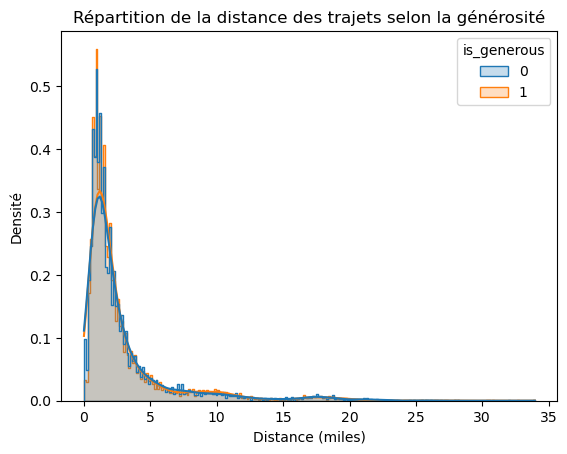

In [25]:
sns.histplot(data=df, x='trip_distance', hue='is_generous', kde=True, element="step", stat="density", common_norm=False)
plt.title('Répartition de la distance des trajets selon la générosité')
plt.xlabel('Distance (miles)')
plt.ylabel('Densité')
plt.show()

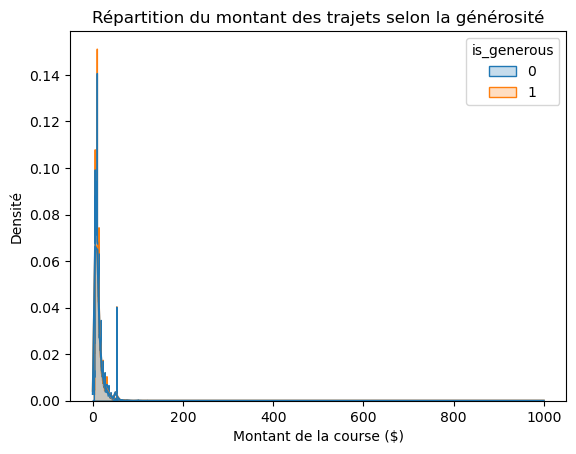

In [26]:
sns.histplot(data=df, x='fare_amount', hue='is_generous', kde=True, element="step", stat="density", common_norm=False)
plt.title('Répartition du montant des trajets selon la générosité')
plt.xlabel('Montant de la course ($)')
plt.ylabel('Densité')
plt.show()

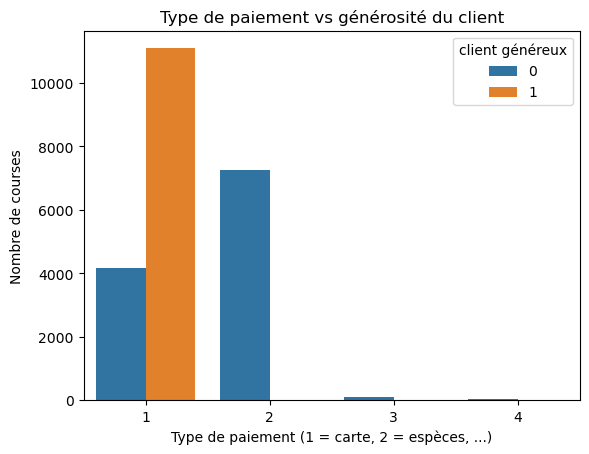

In [27]:
sns.countplot(x='payment_type', hue='is_generous', data=df)
plt.title("Type de paiement vs générosité du client")
plt.xlabel("Type de paiement (1 = carte, 2 = espèces, ...)")
plt.ylabel("Nombre de courses")
plt.legend(title="client généreux")
plt.show()

In [28]:
# supprimer la colonne "tip_amount" car utilsé pour créer la variable cible et "payment_type" car trop proche de la variable cible
df= df.drop("tip_amount",axis=1)
df= df.drop("payment_type",axis=1)

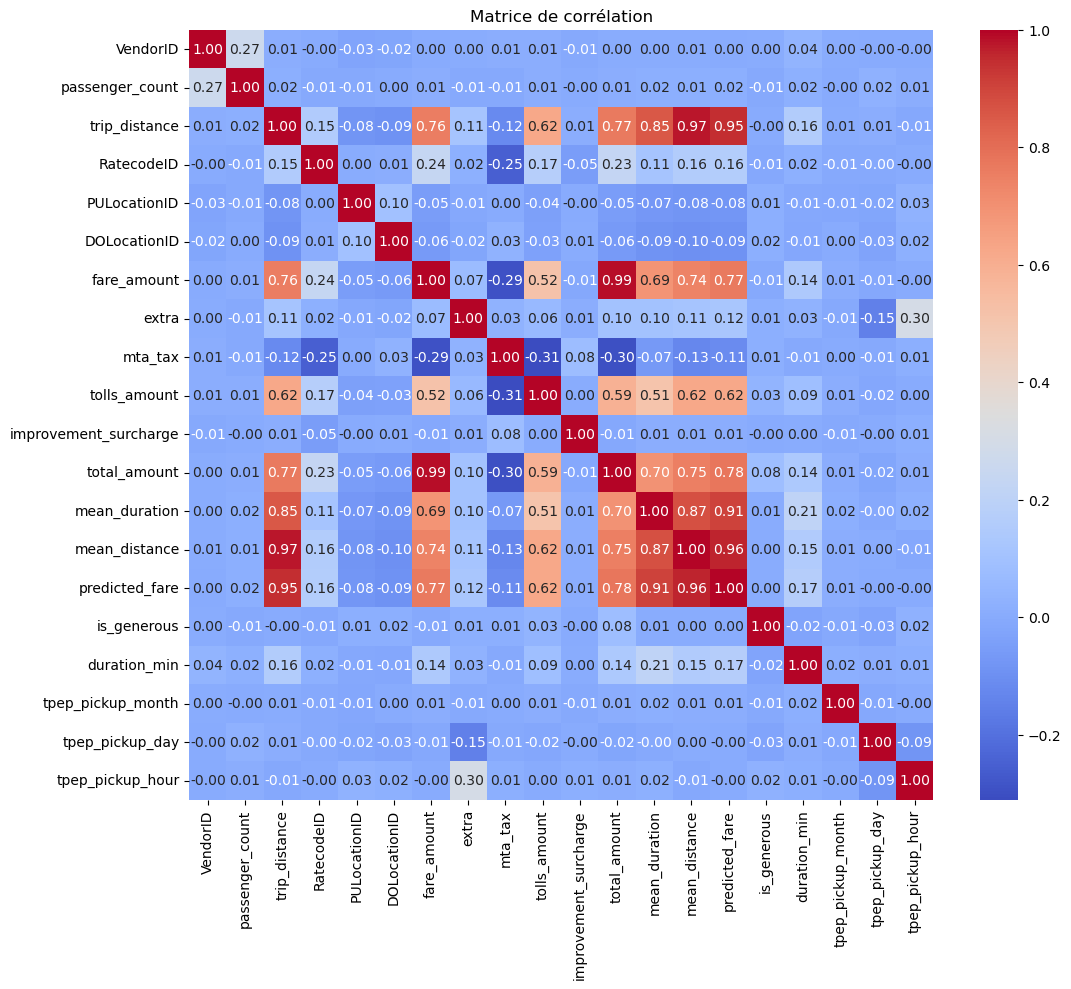

In [29]:
# visualiser la corrélation entre les variables numériques 
plt.figure(figsize=(12, 10)) 
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice de corrélation')
plt.show()

#### <font color = "green"> **Prétraitement**</font>

**- Nettoyer les valeurs aberantes :**

In [30]:
# liste des colonnes succeptibles de contenir des outliers (colonnes numériques)
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
numeric_cols = numeric_cols.drop(['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID'])

In [31]:
# appliquer la méthode IQR pour traiter tout les potentiels outliers dans ces colonnes
df_c = df.copy()
for i in numeric_cols:
    Q1 = df_c[i].quantile(0.25)
    Q3 = df_c[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Filtrer les données qui sont dans les bornes
    df_c = df_c[(df_c[i] >= lower_bound) & (df_c[i] <= upper_bound)]

In [32]:
print(f"Nombre de lignes avant nettoyage : {df.shape[0]}")
print(f"Nombre de lignes après nettoyage : {df_c.shape[0]}")

Nombre de lignes avant nettoyage : 22679
Nombre de lignes après nettoyage : 15714


**- Feature Engineering :**

In [33]:
# créer une variable pour Comparer la distance de la course à la distance moyenne. Cela peut nous donner un aperçu des courses longues ou courtes.
df_c['ratio'] = df_c['trip_distance'] / df_c['mean_distance']
df_c['ratio']

2        1.134522
8        1.177326
9        1.012658
10       1.078611
12       0.907029
           ...   
22693    0.837428
22694    0.555447
22696    0.613818
22697    1.135981
22698    1.421830
Name: ratio, Length: 15714, dtype: float64

In [34]:
# Créer une vitesse moyenne pour voir l'interaction entre la distance et la durée du trajet.
df_c['distance_duration_ratio'] = df_c['trip_distance'] / df_c['duration_min']
df_c['distance_duration_ratio']

2        0.138889
8        0.099037
9        0.078303
10       0.116447
12       0.151899
           ...   
22693    0.094180
22694    0.186735
22696    0.101613
22697    0.197765
22698    0.157500
Name: distance_duration_ratio, Length: 15714, dtype: float64

**- Feature Selection :**

In [35]:
# A partir de notre matrice de corrélation, on peut voir de très fortes corrélations entre certaines variables cela peut créer des
# Problèmes de multicolinéarité dans le modèle. On va donc garder une seule de chacune des deux variables très corrélés.
feature_select = df_c.drop(columns=['mean_distance', 'predicted_fare', 'total_amount'])
feature_select

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,fare_amount,...,tolls_amount,improvement_surcharge,mean_duration,is_generous,duration_min,tpep_pickup_month,tpep_pickup_day,tpep_pickup_hour,ratio,distance_duration_ratio
2,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,6.5,...,0.0,0.3,7.250000,1,7.200000,12,4,7,1.134522,0.138889
8,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,9.0,...,0.0,0.3,7.873457,0,12.116667,2,5,16,1.177326,0.099037
9,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,13.0,...,0.0,0.3,10.541111,1,20.433333,11,4,15,1.012658,0.078303
10,2,2017-03-04 11:58:00,2017-03-04 12:13:12,1,1.77,1,N,162,142,11.5,...,0.0,0.3,14.178333,1,15.200000,3,5,11,1.078611,0.116447
12,1,2017-06-09 19:00:26,2017-06-09 19:20:11,1,3.00,1,N,13,148,15.0,...,0.0,0.3,15.058333,1,19.750000,6,4,19,0.907029,0.151899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,2,2017-08-10 22:20:04,2017-08-10 22:29:31,1,0.89,1,N,229,170,7.5,...,0.0,0.3,8.095370,1,9.450000,8,3,22,0.837428,0.094180
22694,2,2017-02-24 17:37:23,2017-02-24 17:40:39,3,0.61,1,N,48,186,4.0,...,0.0,0.3,8.594643,0,3.266667,2,4,17,0.555447,0.186735
22696,2,2017-09-04 14:54:14,2017-09-04 14:58:22,1,0.42,1,N,107,234,4.5,...,0.0,0.3,6.609091,0,4.133333,9,0,14,0.613818,0.101613
22697,2,2017-07-15 12:56:30,2017-07-15 13:08:26,1,2.36,1,N,68,144,10.5,...,0.0,0.3,16.650000,0,11.933333,7,5,12,1.135981,0.197765


In [36]:
# ensuite on va examiner les autres colonnes pour décider si on les garde ou pas. On va vérifier si celles qui onr du sens pour la prédictions et 
# celles qui sont bien exploitables. On peut supprimer la colonne 'tpep_pickup_datetime' car déjà utilisé pour extraire les données temporelles, 
# 'tpep_dropoff_datetime' car elle n'est pas utile pour la prédiction puisqu'il s'agit de la date de dépot, 'store_and_fwd_flag' car aucun lien avec 
# la générosité du client 
feature_select = df_c.drop(columns=['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'store_and_fwd_flag'])
feature_select

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tolls_amount,...,mean_duration,mean_distance,predicted_fare,is_generous,duration_min,tpep_pickup_month,tpep_pickup_day,tpep_pickup_hour,ratio,distance_duration_ratio
2,1,1,1.00,1,262,236,6.5,0.0,0.5,0.0,...,7.250000,0.881429,7.053706,1,7.200000,12,4,7,1.134522,0.138889
8,2,1,1.20,1,234,249,9.0,0.0,0.5,0.0,...,7.873457,1.019259,7.151511,0,12.116667,2,5,16,1.177326,0.099037
9,1,1,1.60,1,239,237,13.0,0.0,0.5,0.0,...,10.541111,1.580000,9.122755,1,20.433333,11,4,15,1.012658,0.078303
10,2,1,1.77,1,162,142,11.5,0.0,0.5,0.0,...,14.178333,1.641000,10.147760,1,15.200000,3,5,11,1.078611,0.116447
12,1,1,3.00,1,13,148,15.0,1.0,0.5,0.0,...,15.058333,3.307500,14.069371,1,19.750000,6,4,19,0.907029,0.151899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,2,1,0.89,1,229,170,7.5,0.5,0.5,0.0,...,8.095370,1.062778,7.300146,1,9.450000,8,3,22,0.837428,0.094180
22694,2,3,0.61,1,48,186,4.0,1.0,0.5,0.0,...,8.594643,1.098214,7.799138,0,3.266667,2,4,17,0.555447,0.186735
22696,2,1,0.42,1,107,234,4.5,0.0,0.5,0.0,...,6.609091,0.684242,6.130896,0,4.133333,9,0,14,0.613818,0.101613
22697,2,1,2.36,1,68,144,10.5,0.0,0.5,0.0,...,16.650000,2.077500,11.707049,0,11.933333,7,5,12,1.135981,0.197765


**- Normalisation et encodage :**

In [37]:
# c'est deux variables ont beaucop de categorie donc on applique un target encoder 
colonne_cat=["PULocationID","DOLocationID"]

for col in colonne_cat:
    mean_target_per_category = df.groupby(col)["is_generous"].mean()
    feature_select[col] = feature_select[col].map(mean_target_per_category)
    

In [38]:
# OneHotEncoding pour la categorie vendorid
feature_select=pd.get_dummies(feature_select,columns=["VendorID"], dtype=int)
feature_select

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,fare_amount,extra,mta_tax,tolls_amount,improvement_surcharge,...,predicted_fare,is_generous,duration_min,tpep_pickup_month,tpep_pickup_day,tpep_pickup_hour,ratio,distance_duration_ratio,VendorID_1,VendorID_2
2,1,1.00,1,0.505792,0.493766,6.5,0.0,0.5,0.0,0.3,...,7.053706,1,7.200000,12,4,7,1.134522,0.138889,1,0
8,1,1.20,1,0.555407,0.544757,9.0,0.0,0.5,0.0,0.3,...,7.151511,0,12.116667,2,5,16,1.177326,0.099037,0,1
9,1,1.60,1,0.535163,0.484808,13.0,0.0,0.5,0.0,0.3,...,9.122755,1,20.433333,11,4,15,1.012658,0.078303,1,0
10,1,1.77,1,0.510911,0.452614,11.5,0.0,0.5,0.0,0.3,...,10.147760,1,15.200000,3,5,11,1.078611,0.116447,0,1
12,1,3.00,1,0.506608,0.481203,15.0,1.0,0.5,0.0,0.3,...,14.069371,1,19.750000,6,4,19,0.907029,0.151899,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22693,1,0.89,1,0.536697,0.544413,7.5,0.5,0.5,0.0,0.3,...,7.300146,1,9.450000,8,3,22,0.837428,0.094180,0,1
22694,3,0.61,1,0.456140,0.529862,4.0,1.0,0.5,0.0,0.3,...,7.799138,0,3.266667,2,4,17,0.555447,0.186735,0,1
22696,1,0.42,1,0.516949,0.524962,4.5,0.0,0.5,0.0,0.3,...,6.130896,0,4.133333,9,0,14,0.613818,0.101613,0,1
22697,1,2.36,1,0.484685,0.517857,10.5,0.0,0.5,0.0,0.3,...,11.707049,0,11.933333,7,5,12,1.135981,0.197765,0,1


In [39]:
# normalisation des variables de temps heures, jours, mois  on utilise le sinus pour incarner la notion de cycle
feature_select['tpep_pickup_hour'] = np.sin(2 * np.pi * feature_select['tpep_pickup_hour'] / 24)
feature_select['tpep_pickup_month'] = np.sin(2 * np.pi * (feature_select['tpep_pickup_month'] - 1) / 12)
feature_select['tpep_pickup_day'] = np.sin(2 * np.pi * (feature_select['tpep_pickup_day'] - 1) / 7)

In [40]:
# normalisation des variables numeriques 
colonne_norm=["trip_distance","passenger_count","distance_duration_ratio","ratio","fare_amount","predicted_fare","duration_min"]

for col in colonne_norm:
    feature_select[col]=(feature_select[col]-feature_select[col].min())/(feature_select[col].max()-feature_select[col].min())

#### <font color = "green"> **Construction**</font>

**- Choisir l'algorithme approprié  :**

**- Concevoir l'architecture du modèle :**

In [41]:
!pip install lightgbm

In [42]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split

# Séparer les données
X = feature_select.drop('is_generous', axis=1)  # Features
y = feature_select['is_generous']  # cible 

# Diviser en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**- Entraîner le modèle :**

In [43]:
# Convertir les données en dataset LightGBM
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Paramètres LightGBM
params = {
    'objective': 'binary',        # Classification binaire
    'metric': 'binary_error',     # j'utilise l'erreur binaire comme métrique il s'agit de (1 - accuracy)
    'boosting_type': 'gbdt',      # j'utilise Gradient Boosting Decision Tree comme algorithme par défaut
    'num_leaves': 31,             # Nombre de feuilles dans l'arbre
    'learning_rate': 0.05,        # pas d'apprentissage
    'feature_fraction': 0.9       # pour que 90 % des colonnes soient sélectionnées aléatoirement à chaque itération pour éviter l’overfitting.
}

# Entraînement du modèle avec early stopping intégré (pour arrêter automatiquement l'entraînement si les performances ne s'améliorent pas après 
# 100 itérations)
callbacks = [lgb.early_stopping(stopping_rounds=100)]

model = lgb.train(params, train_data, valid_sets=[test_data], num_boost_round=1000, callbacks=callbacks)

[LightGBM] [Info] Number of positive: 6193, number of negative: 6378
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001744 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2269
[LightGBM] [Info] Number of data points in the train set: 12571, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492642 -> initscore=-0.029435
[LightGBM] [Info] Start training from score -0.029435
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[337]	valid_0's binary_error: 0.00795418


**- Évaluer le Modèle :**

In [44]:
# Prédictions
y_pred_prob = model.predict(X_test, num_iteration=model.best_iteration)
y_pred = (y_pred_prob >= 0.5).astype(int)  # Conversion des probabilités en classes (0 ou 1)

# Calcul des métriques pour evaluer la qualité des prédictions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage des résultats
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Matrixe de confusion:\n{conf_matrix}')

Accuracy: 0.9920
Precision: 0.9861
Recall: 0.9981
F1 Score: 0.9921
Matrixe de confusion:
[[1557   22]
 [   3 1561]]


Résultats du modèle : <br>
**- Accuracy : 99.20%** Cela signifie que 99,2 % des prédictions sont correctes (tant positives que négatives).<br>
**- Precision : 98.61%** Parmi toutes les prédictions positives (clients généreux), 98,61 % étaient effectivement correctes. Cela montre que le modèle a une faible proportion de faux positifs.<br>
**- Recall : 99.81%** Le modèle est très bon pour identifier les clients généreux. Sur tous les clients réellement généreux, 99,81 % sont correctement identifiés (très peu de faux négatifs).<br>
**- F1 Score : 99.21%** Le F1 score est élevé, indiquant un bon équilibre entre la précision et le rappel, ce qui est important dans des cas comme celui-ci, où on veut à la fois éviter les faux positifs et les faux négatifs.

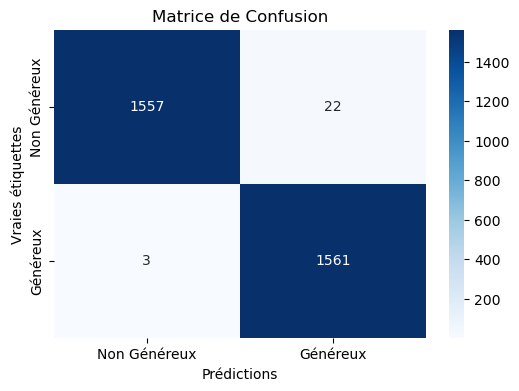

In [45]:
# Matrice de confusion
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(test_data.label, y_pred)

# Affichage de la matrice de confusion
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Généreux', 'Généreux'], yticklabels=['Non Généreux', 'Généreux'])
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.title('Matrice de Confusion')
plt.show()

In [46]:
# Optimiser les Hyperparamètres avec GridSearchCV
from sklearn.model_selection import GridSearchCV

# Définir le modèle LightGBM
lgbm = lgb.LGBMClassifier(objective='binary', metric='binary_error')

# Définir les hyperparamètres à tester
param_grid = {
    'num_leaves': [31, 50],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'max_depth': [-1, 10, 20]
}

# Appliquer GridSearchCV
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Best parameters found: {grid_search.best_params_}")

[LightGBM] [Info] Number of positive: 4954, number of negative: 5102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003724 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2272
[LightGBM] [Info] Number of data points in the train set: 10056, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492641 -> initscore=-0.029437
[LightGBM] [Info] Start training from score -0.029437
[LightGBM] [Info] Number of positive: 4954, number of negative: 5103
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003114 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2271
[LightGBM] [Info] Number of data points in the train set: 10057, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.492592 -> initscore=-0.029633
[LightGBM] [Info] Start training from score -0.029633
[LightGBM] [Info

In [47]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Affichage des résultats
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Matrixe de confusion:\n{conf_matrix}')

Accuracy: 0.9936
Precision: 0.9898
Recall: 0.9974
F1 Score: 0.9936
Matrixe de confusion:
[[1563   16]
 [   4 1560]]


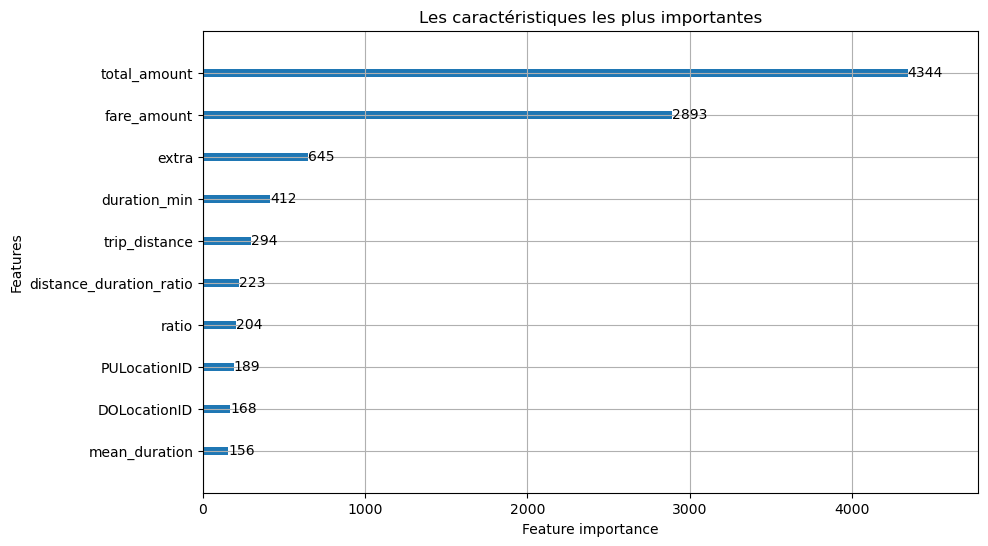

In [48]:
# Visualiser l'importance des Variables par "split" (Cela correspond au nombre de fois qu'une variable a été utilisée pour effectuer une division dans 
# les arbres du modèle.
lgb.plot_importance(model, max_num_features=10, importance_type='split', title='Les caractéristiques les plus importantes', figsize=(10, 6))
plt.show()

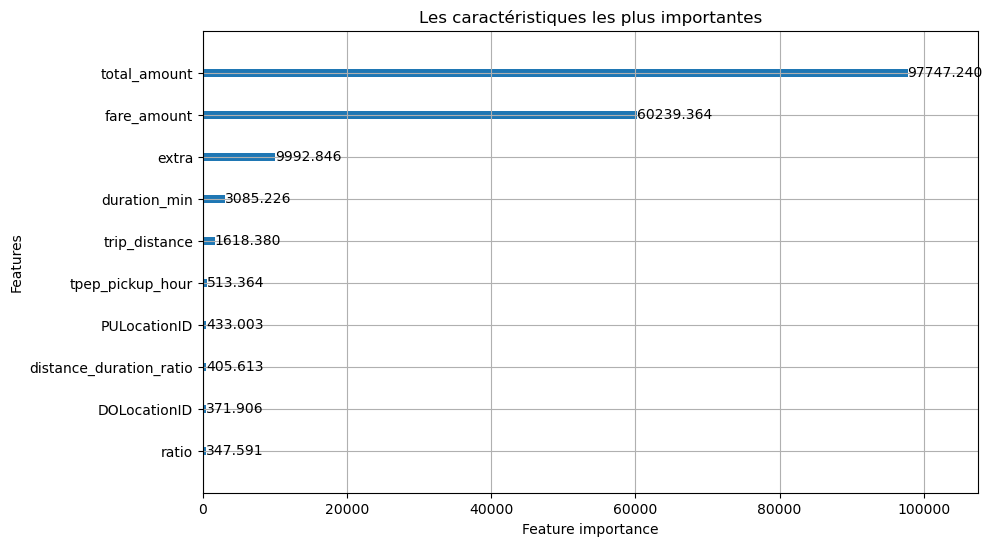

In [49]:
# Visualiser l'importance des Variables par "gain" (Cela mesure la quantité d'amélioration qu'une variable apporte à chaque split en termes de 
# réduction d'erreur.)
lgb.plot_importance(model, max_num_features=10, importance_type='gain', title='Les caractéristiques les plus importantes', figsize=(10, 6))
plt.show()

#### <font color = "green"> **Conclusion**</font>

IMPLEMENTATION DU MODELE DE REGRESSION LOGISTIQUE

In [50]:
df_c.dtypes

VendorID                            int64
tpep_pickup_datetime       datetime64[ns]
tpep_dropoff_datetime      datetime64[ns]
passenger_count                     int64
trip_distance                     float64
RatecodeID                          int64
store_and_fwd_flag                 object
PULocationID                        int64
DOLocationID                        int64
fare_amount                       float64
extra                             float64
mta_tax                           float64
tolls_amount                      float64
improvement_surcharge             float64
total_amount                      float64
mean_duration                     float64
mean_distance                     float64
predicted_fare                    float64
is_generous                         int32
duration_min                      float64
tpep_pickup_month                   int32
tpep_pickup_day                     int32
tpep_pickup_hour                    int32
ratio                             

In [51]:
df_c = df_c.drop(columns=['tpep_pickup_datetime'])
df_c = df_c.drop(columns=['tpep_dropoff_datetime'])


In [52]:
df_c.dtypes


VendorID                     int64
passenger_count              int64
trip_distance              float64
RatecodeID                   int64
store_and_fwd_flag          object
PULocationID                 int64
DOLocationID                 int64
fare_amount                float64
extra                      float64
mta_tax                    float64
tolls_amount               float64
improvement_surcharge      float64
total_amount               float64
mean_duration              float64
mean_distance              float64
predicted_fare             float64
is_generous                  int32
duration_min               float64
tpep_pickup_month            int32
tpep_pickup_day              int32
tpep_pickup_hour             int32
ratio                      float64
distance_duration_ratio    float64
dtype: object

In [57]:
feature_select.isna().sum()

passenger_count             0
trip_distance               0
RatecodeID                  0
PULocationID                0
DOLocationID                0
fare_amount                 0
extra                       0
mta_tax                     0
tolls_amount                0
improvement_surcharge       0
total_amount                0
mean_duration               0
mean_distance               0
predicted_fare              0
is_generous                 0
duration_min                0
tpep_pickup_month           0
tpep_pickup_day             0
tpep_pickup_hour            0
ratio                      22
distance_duration_ratio    19
VendorID_1                  0
VendorID_2                  0
dtype: int64

In [58]:
data_c = feature_select.dropna(axis=1)

In [59]:
data_c.isna().sum()

passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
fare_amount              0
extra                    0
mta_tax                  0
tolls_amount             0
improvement_surcharge    0
total_amount             0
mean_duration            0
mean_distance            0
predicted_fare           0
is_generous              0
duration_min             0
tpep_pickup_month        0
tpep_pickup_day          0
tpep_pickup_hour         0
VendorID_1               0
VendorID_2               0
dtype: int64

In [60]:
#séparons nos données d'entraînement et les données de test
x_1 = data_c.drop(["is_generous"], axis=1)
y_1 = data_c["is_generous"]
from sklearn.model_selection import train_test_split
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.3, random_state=1)

In [61]:
#entraînons notre modèle sur les données d'entraînement
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_1_train, y_1_train)

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [63]:
#testons notre modèle avec les données de test
y_pred = classifier.predict(x_1_test)


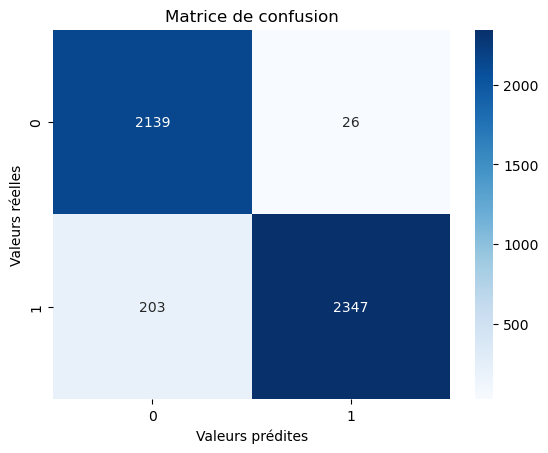

              precision    recall  f1-score   support

           0       0.99      0.91      0.95      2342
           1       0.92      0.99      0.95      2373

    accuracy                           0.95      4715
   macro avg       0.95      0.95      0.95      4715
weighted avg       0.95      0.95      0.95      4715



In [73]:
#évaluons à présent notre modèle
from sklearn.metrics import confusion_matrix
m_con = confusion_matrix(y_pred, y_1_test)

sns.heatmap(m_con, annot=True, fmt='d', cmap='Blues')
plt.title("Matrice de confusion")
plt.xlabel("Valeurs prédites")
plt.ylabel("Valeurs réelles")
plt.show()

#évaluons la précision en utilisant quelques métriques
from sklearn.metrics import classification_report

print(classification_report(y_1_test, y_pred))

In [71]:
y_1_test.value_counts()

is_generous
1    2373
0    2342
Name: count, dtype: int64

Notre modèle est assez performant car on a une précision très élevée de 99% pour les non_généreux et 92% pour les clients généreux. Nous avons également un très bon recall et f1_score